## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [26]:
import numpy as np

def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):

  
    np.random.seed(0)
    
    # Initialize weights and biases for first hidden layer
    W1 = np.random.randn(hidden_size1, input_size) * 0.01
    b1 = np.zeros((hidden_size1, 1))
    
    # Initialize weights and biases for second hidden layer
    W2 = np.random.randn(hidden_size2, hidden_size1) * 0.01
    b2 = np.zeros((hidden_size2, 1))
    
    # Initialize weights and biases for output layer
    W3 = np.random.randn(output_size, hidden_size2) * 0.01
    b3 = np.zeros((output_size, 1))
    
    return W1, b1, W2, b2, W3, b3

# Example usage
W1, b1, W2, b2, W3, b3 = initialize_parameters(3, 4, 4, 1)
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print("W3:", W3)
print("b3:", b3)

W1: [[ 0.01764052  0.00400157  0.00978738]
 [ 0.02240893  0.01867558 -0.00977278]
 [ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]]
b1: [[0.]
 [0.]
 [0.]
 [0.]]
W2: [[ 0.00761038  0.00121675  0.00443863  0.00333674]
 [ 0.01494079 -0.00205158  0.00313068 -0.00854096]
 [-0.0255299   0.00653619  0.00864436 -0.00742165]
 [ 0.02269755 -0.01454366  0.00045759 -0.00187184]]
b2: [[0.]
 [0.]
 [0.]
 [0.]]
W3: [[0.01532779 0.01469359 0.00154947 0.00378163]]
b3: [[0.]]


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


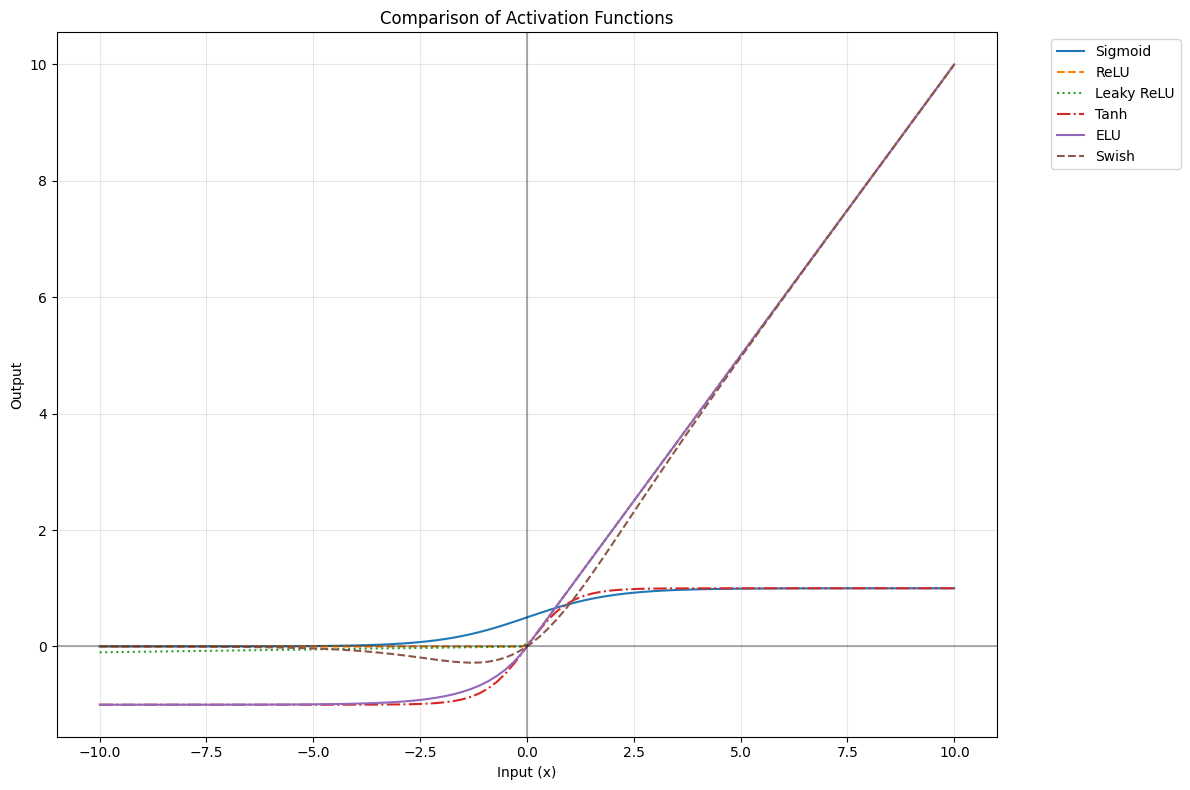

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def tanh(x):
    return np.tanh(x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)


x = np.linspace(-10, 10, 100)


plt.figure(figsize=(12, 8))


plt.plot(x, sigmoid(x), label="Sigmoid", linestyle='-')
plt.plot(x, relu(x), label="ReLU", linestyle='--')
plt.plot(x, leaky_relu(x), label="Leaky ReLU", linestyle=':')
plt.plot(x, tanh(x), label="Tanh", linestyle='-.')
plt.plot(x, elu(x), label="ELU", linestyle='-')
plt.plot(x, swish(x), label="Swish", linestyle='--')


plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Comparison of Activation Functions")
plt.xlabel("Input (x)")
plt.ylabel("Output")


plt.tight_layout()
plt.show()



## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [24]:
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
 
    # First hidden layer
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    # Second hidden layer
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    # Output layer
    Z3 = np.dot(W3, A2) + b3
    return Z3  


def relu(Z):
    return np.maximum(0, Z)

# Example usage with random input
X = np.random.randn(3, 1)
output = forward_propagation(X, W1, b1, W2, b2, W3, b3)
print("Output of forward propagation:", output)

Output of forward propagation: [[-0.09922022]]


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [23]:
def compute_loss_with_l2(Y, Y_hat, W1, W2, W3, lambd=0.1):
   
 
    m = Y.shape[1]
    
    # Compute MSE loss
    mse_loss = np.mean((Y - Y_hat) ** 2)
    
   
    l2_penalty = (lambd / (2 * m)) * (
        np.sum(np.square(W1)) + 
        np.sum(np.square(W2)) + 
        np.sum(np.square(W3))
    )
    
    # Return total loss
    return mse_loss + l2_penalty

# Example usage
Y = np.array([[1]])
Y_hat = np.array([[0.8]])
loss = compute_loss_with_l2(Y, Y_hat, W1, W2, W3)
print("Loss with L2 regularization:", loss)


loss_higher_reg = compute_loss_with_l2(Y, Y_hat, W1, W2, W3, lambd=0.5)
print("Loss with higher regularization:", loss_higher_reg)

Loss with L2 regularization: 0.04019242822074227
Loss with higher regularization: 0.04096214110371141


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [21]:
import numpy as np

def calculate_gradients_layer1(X, Y, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, m):
   
    dZ3 = Z3 - Y
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * (Z2 > 0)  # ReLU derivative
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    
    # Gradients for W1 and b1
    grad_W1 = (1/m) * np.dot(dZ1, X.T)
    grad_b1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return grad_W1, grad_b1

def calculate_gradients_layer2(Y, W3, b3, Z2, A1, A2, Z3, m):
    """
    Calculate gradients for second layer parameters
    """
    dZ3 = Z3 - Y
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * (Z2 > 0)  # ReLU derivative
    
    # Gradients for W2 and b2
    grad_W2 = (1/m) * np.dot(dZ2, A1.T)
    grad_b2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    return grad_W2, grad_b2

def calculate_gradients_layer3(Y, A2, Z3, m):
    """
    Calculate gradients for third layer parameters
    """
    dZ3 = Z3 - Y
    
    # Gradients for W3 and b3
    grad_W3 = (1/m) * np.dot(dZ3, A2.T)
    grad_b3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
    
    return grad_W3, grad_b3


learning_rate = 0.01
for i in range(10):
    # Forward propagation
    # Layer 1
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU
    
    # Layer 2
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)  # ReLU
    
    # Layer 3
    Z3 = np.dot(W3, A2) + b3
    
    # Calculate loss
    m = Y.shape[1]
    loss = compute_loss_with_l2(Y, Z3, W1, W2, W3)
    print(f"Iteration {i+1}, Loss: {loss}")
    
    # 
    grad_W1, grad_b1 = calculate_gradients_layer1(X, Y, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, m)
    grad_W2, grad_b2 = calculate_gradients_layer2(Y, W3, b3, Z2, A1, A2, Z3, m)
    grad_W3, grad_b3 = calculate_gradients_layer3(Y, A2, Z3, m)
    
    # 
    W1, b1 = gradient_descent(W1, b1, grad_W1, grad_b1, learning_rate)
    W2, b2 = gradient_descent(W2, b2, grad_W2, grad_b2, learning_rate)
    W3, b3 = gradient_descent(W3, b3, grad_W3, grad_b3, learning_rate)

Iteration 1, Loss: 0.4696002014355784
Iteration 2, Loss: 0.466680447023829
Iteration 3, Loss: 0.4638187957248735
Iteration 4, Loss: 0.4610140912867672
Iteration 5, Loss: 0.45826520046697905
Iteration 6, Loss: 0.45557101257450494
Iteration 7, Loss: 0.452930439021091
Iteration 8, Loss: 0.45034241288139
Iteration 9, Loss: 0.4478058884618689
Iteration 10, Loss: 0.44531984087829624


## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [20]:
import numpy as np

def adam_optimizer(weights, grads, m, v, t, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Adam optimization 
    """
    m = beta1 * m + (1 - beta1) * grads
    v = beta2 * v + (1 - beta2) * (grads ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    weights -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return weights, m, v

# Initialize Adam parameters
m_W1 = np.zeros_like(W1)
v_W1 = np.zeros_like(W1)
m_b1 = np.zeros_like(b1)
v_b1 = np.zeros_like(b1)

m_W2 = np.zeros_like(W2)
v_W2 = np.zeros_like(W2)
m_b2 = np.zeros_like(b2)
v_b2 = np.zeros_like(b2)

m_W3 = np.zeros_like(W3)
v_W3 = np.zeros_like(W3)
m_b3 = np.zeros_like(b3)
v_b3 = np.zeros_like(b3)

# Training loop with Adam
for t in range(1, 11):  # 10 iterations
    # Forward propagation
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.maximum(0, Z2)
    Z3 = np.dot(W3, A2) + b3
    
    # Calculate loss
    loss = compute_loss_with_l2(Y, Z3, W1, W2, W3)
    print(f"Iteration {t}, Loss: {loss}")
    
    # Calculate gradients
    grad_W1, grad_b1 = calculate_gradients_layer1(X, Y, W1, b1, W2, b2, W3, b3, Z1, A1, Z2, A2, Z3, X.shape[1])
    grad_W2, grad_b2 = calculate_gradients_layer2(Y, W3, b3, Z2, A1, A2, Z3, X.shape[1])
    grad_W3, grad_b3 = calculate_gradients_layer3(Y, A2, Z3, X.shape[1])
    
    # Update parameters using Adam
    W1, m_W1, v_W1 = adam_optimizer(W1, grad_W1, m_W1, v_W1, t)
    b1, m_b1, v_b1 = adam_optimizer(b1, grad_b1, m_b1, v_b1, t)
    
    W2, m_W2, v_W2 = adam_optimizer(W2, grad_W2, m_W2, v_W2, t)
    b2, m_b2, v_b2 = adam_optimizer(b2, grad_b2, m_b2, v_b2, t)
    
    W3, m_W3, v_W3 = adam_optimizer(W3, grad_W3, m_W3, v_W3, t)
    b3, m_b3, v_b3 = adam_optimizer(b3, grad_b3, m_b3, v_b3, t)

Iteration 1, Loss: 0.4773544681568039
Iteration 2, Loss: 0.47656940051059465
Iteration 3, Loss: 0.475786385430874
Iteration 4, Loss: 0.4750054575159304
Iteration 5, Loss: 0.4742266509412426
Iteration 6, Loss: 0.4734499993824712
Iteration 7, Loss: 0.4726755359412472
Iteration 8, Loss: 0.47190329307429996
Iteration 9, Loss: 0.4711333025264251
Iteration 10, Loss: 0.4703655952677345
